## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [5]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[256, 128, 64], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.5, 0.25, 0.1]
layer_counts = [2, 3, 4]
num_neurons = {2: [256, 64],
               3: [256, 128, 64],
               4: [256, 128, 64, 32]}

In [14]:
results = {}
for L_counts, D_ratio in itertools.product(layer_counts, Dropout_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with layers_counts = %.6f, Dropout_ratio = %.6f" % (L_counts, D_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num_neurons[L_counts], drp_ratio=D_ratio)
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-layers_counts-%s-dropout_ratio-%s" % (str(L_counts), str(D_ratio))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with layers_counts = 2.000000, Dropout_ratio = 0.500000


W0903 22:49:02.302164  5544 deprecation.py:506] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0903 22:49:02.493296  5544 deprecation_wrapper.py:119] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 803,786
Trainable params: 803,786
Non-trainable params: 0
_________________________________________________________________


W0903 22:49:05.078402  5544 deprecation.py:323] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 13s 265us/step - loss: 2.2306 - acc: 0.1519 - val_loss: 2.0843 - val_acc: 0.2318
Epoch 2/30
50000/50000 [==============================] - 10s 205us/step - loss: 2.1028 - acc: 0.2017 - val_loss: 1.9919 - val_acc: 0.2858
Epoch 3/30
50000/50000 [==============================] - 9s 184us/step - loss: 2.0661 - acc: 0.2168 - val_loss: 1.9685 - val_acc: 0.2811
Epoch 4/30
50000/50000 [==============================] - 9s 178us/step - loss: 2.0479 - acc: 0.2237 - val_loss: 1.9536 - val_acc: 0.2949
Epoch 5/30
50000/50000 [==============================] - 9s 176us/step - loss: 2.0329 - acc: 0.2318 - val_loss: 1.9397 - val_acc: 0.3008
Epoch 6/30
50000/50000 [==============================] - 9s 178us/step - loss: 2.0186 - acc: 0.2368 - val_loss: 1.9380 - val_acc: 0.2976
Epoch 7/30
50000/50000 [==============================] - 9s 177us/step - loss: 2.0152 - acc: 0.2392 - val_loss: 1.9450 

Epoch 21/30
50000/50000 [==============================] - 9s 170us/step - loss: 1.6609 - acc: 0.3999 - val_loss: 1.5753 - val_acc: 0.4479
Epoch 22/30
50000/50000 [==============================] - 9s 170us/step - loss: 1.6532 - acc: 0.4009 - val_loss: 1.5816 - val_acc: 0.4349
Epoch 23/30
50000/50000 [==============================] - 9s 171us/step - loss: 1.6540 - acc: 0.4033 - val_loss: 1.5582 - val_acc: 0.4485
Epoch 24/30
50000/50000 [==============================] - 9s 171us/step - loss: 1.6491 - acc: 0.4029 - val_loss: 1.5625 - val_acc: 0.4518
Epoch 25/30
50000/50000 [==============================] - 9s 173us/step - loss: 1.6494 - acc: 0.4039 - val_loss: 1.6014 - val_acc: 0.4332
Epoch 26/30
50000/50000 [==============================] - 9s 171us/step - loss: 1.6483 - acc: 0.4052 - val_loss: 1.5591 - val_acc: 0.4480
Epoch 27/30
50000/50000 [==============================] - 8s 168us/step - loss: 1.6453 - acc: 0.4058 - val_loss: 1.5700 - val_acc: 0.4361
Epoch 28/30
50000/50000 [==

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 10s 191us/step - loss: 2.3155 - acc: 0.0995 - val_loss: 2.3026 - val_acc: 0.1005
Epoch 2/30
50000/50000 [==============================] - 9s 179us/step - loss: 2.3027 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.1001
Epoch 3/30
50000/50000 [==============================] - 9s 181us/step - loss: 2.2957 - acc: 0.1041 - val_loss: 2.2812 - val_acc: 0.1425
Epoch 4/30
50000/50000 [==============================] - 9s 181us/step - loss: 2.2637 - acc: 0.1311 - val_loss: 2.2101 - val_acc: 0.1689
Epoch 5/30
50000/50000 [==============================] - 9s 181us/step - loss: 2.2513 - acc: 0.1323 - val_loss: 2.1901 - val_acc: 0.1651
Epoch 6/30
50000/50000 [==============================] - 9s 180us/step - loss: 2.2446 - acc: 0.1354 - val_loss: 2.1939 - val_acc: 0.1631
Epoch 7/30
50000/50000 [==============================] - 9s 177us/step - loss: 2.2381 - acc: 0.1362 - val_loss: 2.1922 -

Epoch 19/30
50000/50000 [==============================] - 9s 188us/step - loss: 1.6849 - acc: 0.3888 - val_loss: 1.6075 - val_acc: 0.4301
Epoch 20/30
50000/50000 [==============================] - 9s 189us/step - loss: 1.6756 - acc: 0.3947 - val_loss: 1.6062 - val_acc: 0.4277
Epoch 21/30
50000/50000 [==============================] - 9s 189us/step - loss: 1.6758 - acc: 0.3956 - val_loss: 1.5853 - val_acc: 0.4396
Epoch 22/30
50000/50000 [==============================] - 9s 188us/step - loss: 1.6759 - acc: 0.3936 - val_loss: 1.6025 - val_acc: 0.4251
Epoch 23/30
50000/50000 [==============================] - 9s 187us/step - loss: 1.6692 - acc: 0.3947 - val_loss: 1.5646 - val_acc: 0.4401
Epoch 24/30
50000/50000 [==============================] - 9s 185us/step - loss: 1.6706 - acc: 0.3953 - val_loss: 1.5782 - val_acc: 0.4435
Epoch 25/30
50000/50000 [==============================] - 9s 173us/step - loss: 1.6641 - acc: 0.3984 - val_loss: 1.5844 - val_acc: 0.4397
Epoch 26/30
50000/50000 [==

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 10s 199us/step - loss: 2.3191 - acc: 0.1046 - val_loss: 2.2771 - val_acc: 0.1449
Epoch 2/30
50000/50000 [==============================] - 10s 190us/step - loss: 2.2769 - acc: 0.1276 - val_loss: 2.2489 - val_acc: 0.1442
Epoch 3/30
50000/50000 [==============================] - 9s 189us/step - loss: 2.2391 - acc: 0.1381 - val_loss: 2.1952 - val_acc: 0.1717
Epoch 4/30
50000/50000 [==============================] - 10s 207us/step - loss: 2.2194 - acc: 0.1468 - val_loss: 2.1705 - val_acc: 0.1834
Epoch 5/30
50000/50000 [==============================] - 10s 201us/step - loss: 2.1914 - acc: 0.1566 - val_loss: 2.1662 - val_acc: 0.1658
Epoch 6/30
50000/50000 [==============================] - 9s 182us/step - loss: 2.1801 - acc: 0.1591 - val_loss: 2.1603 - val_acc: 0.1801
Epoch 7/30
50000/50000 [==============================] - 9s 182us/step - loss: 2.1673 - acc: 0.1667 - val_loss: 2.137

50000/50000 [==============================] - 9s 183us/step - loss: 1.7959 - acc: 0.3456 - val_loss: 1.7150 - val_acc: 0.3860
Epoch 17/30
50000/50000 [==============================] - 9s 180us/step - loss: 1.7956 - acc: 0.3447 - val_loss: 1.7371 - val_acc: 0.3720
Epoch 18/30
50000/50000 [==============================] - 9s 181us/step - loss: 1.7933 - acc: 0.3489 - val_loss: 1.7037 - val_acc: 0.4016
Epoch 19/30
50000/50000 [==============================] - 9s 181us/step - loss: 1.7905 - acc: 0.3484 - val_loss: 1.7044 - val_acc: 0.4040
Epoch 20/30
50000/50000 [==============================] - 9s 181us/step - loss: 1.7886 - acc: 0.3479 - val_loss: 1.7117 - val_acc: 0.3954
Epoch 21/30
50000/50000 [==============================] - 9s 181us/step - loss: 1.7773 - acc: 0.3574 - val_loss: 1.7104 - val_acc: 0.3975
Epoch 22/30
50000/50000 [==============================] - 9s 186us/step - loss: 1.7768 - acc: 0.3560 - val_loss: 1.7061 - val_acc: 0.3980
Epoch 23/30
50000/50000 [==============

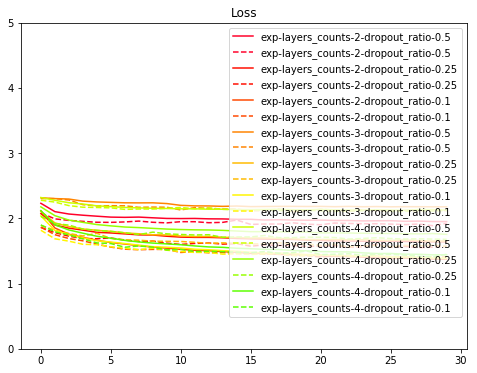

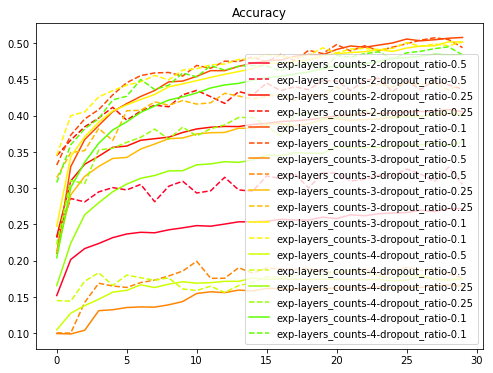

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 25

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()